In [18]:
# DBSCAN 의 예제이다.

In [19]:
import pandas as pd
import numpy as np


from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

In [20]:
df = pd.read_csv('data\Mall_Customers.csv')

<>:1: SyntaxWarning: invalid escape sequence '\M'
<>:1: SyntaxWarning: invalid escape sequence '\M'
C:\Users\vulca\AppData\Local\Temp\ipykernel_36120\4054610935.py:1: SyntaxWarning: invalid escape sequence '\M'
  df = pd.read_csv('data\Mall_Customers.csv')


In [21]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [22]:
X = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]
X.to_csv('data\Mall_Customer_data.csv', index = False)

<>:2: SyntaxWarning: invalid escape sequence '\M'
<>:2: SyntaxWarning: invalid escape sequence '\M'
C:\Users\vulca\AppData\Local\Temp\ipykernel_36120\231027561.py:2: SyntaxWarning: invalid escape sequence '\M'
  X.to_csv('data\Mall_Customer_data.csv', index = False)


In [23]:
# X = pd.read_csv('data\Mall_Customer_data.csv')

In [24]:
scaler = StandardScaler()
data_scale = scaler.fit_transform(X)

In [25]:
# dbscan 불러오기. eps와 min_samples를 설정한다.
dbscan = DBSCAN(eps=5, min_samples=5)

In [26]:
df['Cluster'] = dbscan.fit_predict(X)

In [27]:
df['Cluster']

0     -1
1      0
2     -1
3      0
4     -1
      ..
195   -1
196   -1
197   -1
198   -1
199   -1
Name: Cluster, Length: 200, dtype: int64

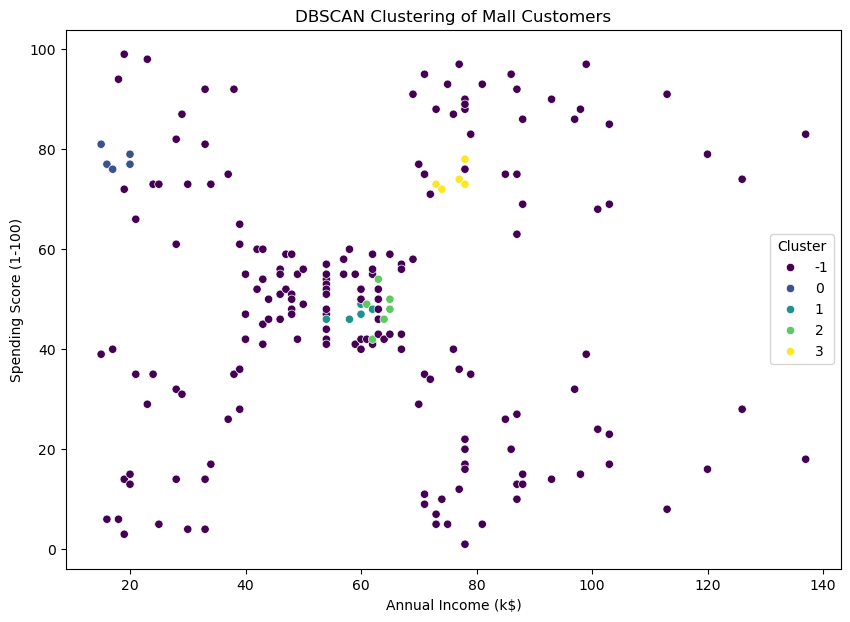

In [28]:
plt.figure(figsize=(10, 7))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', data=df, palette='viridis')
plt.title('DBSCAN Clustering of Mall Customers')
plt.show()

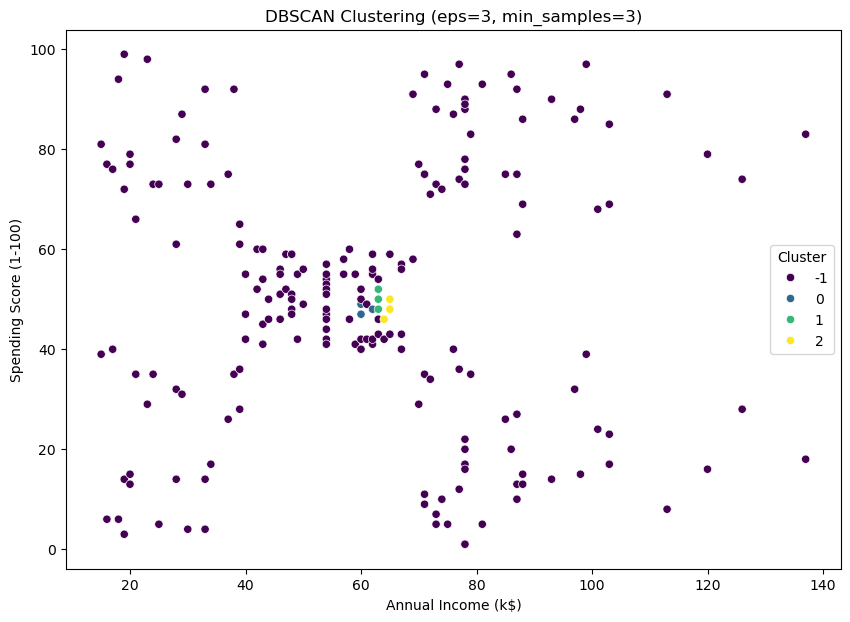

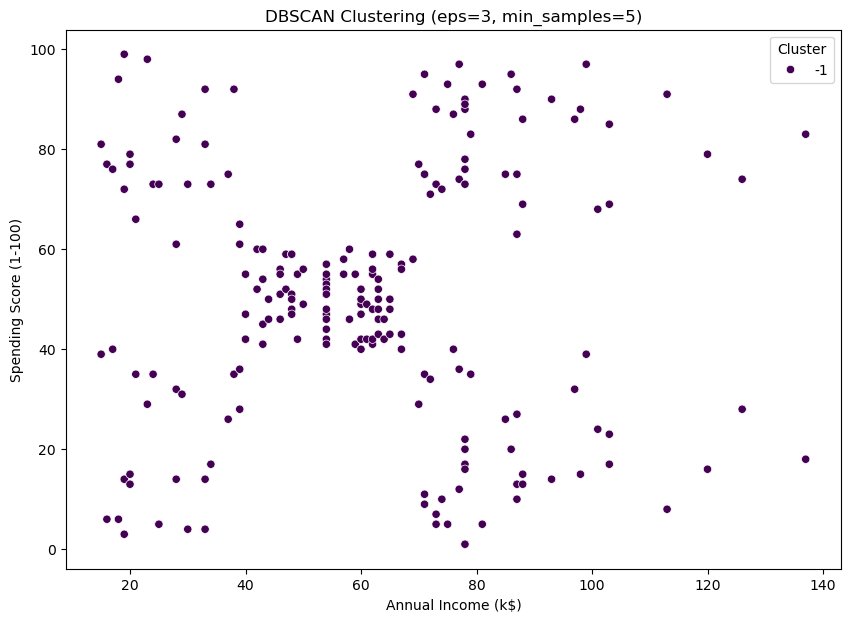

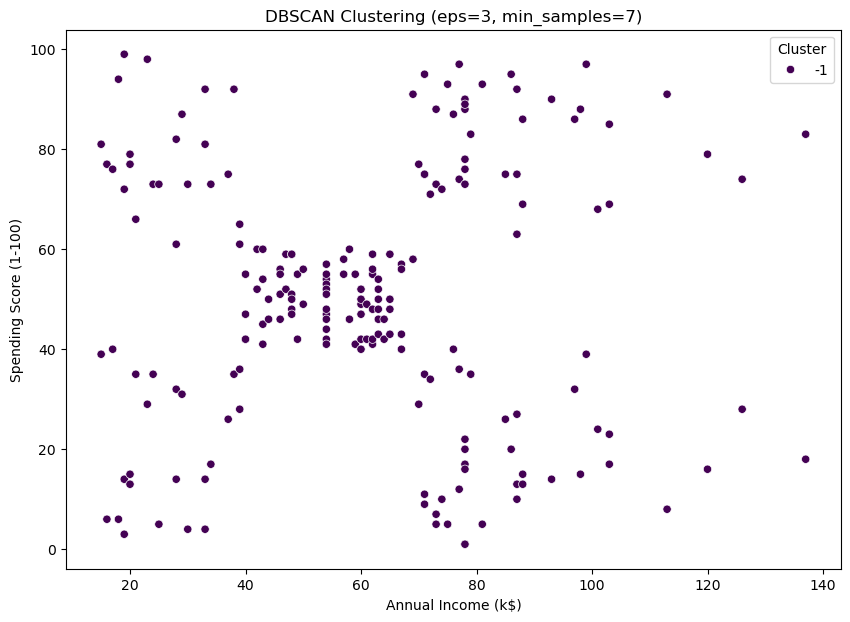

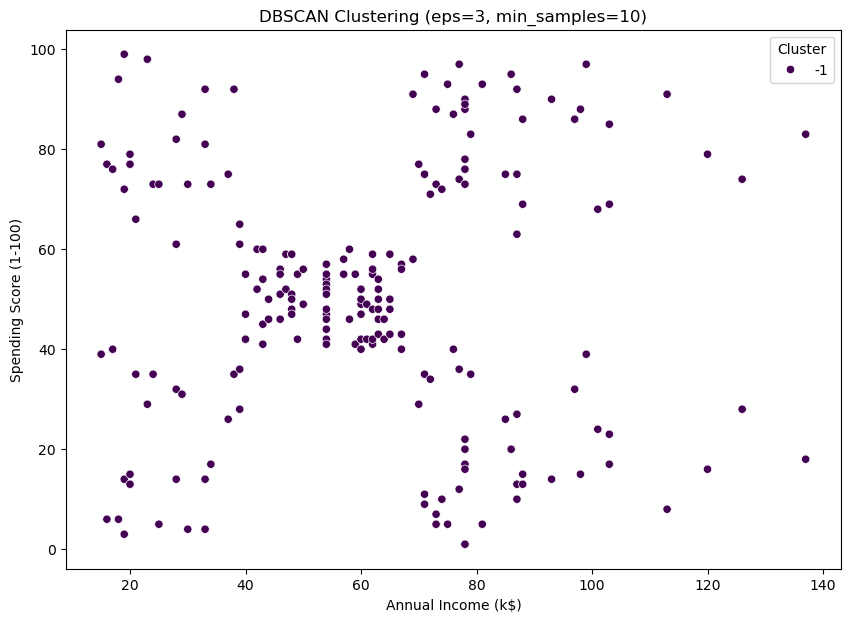

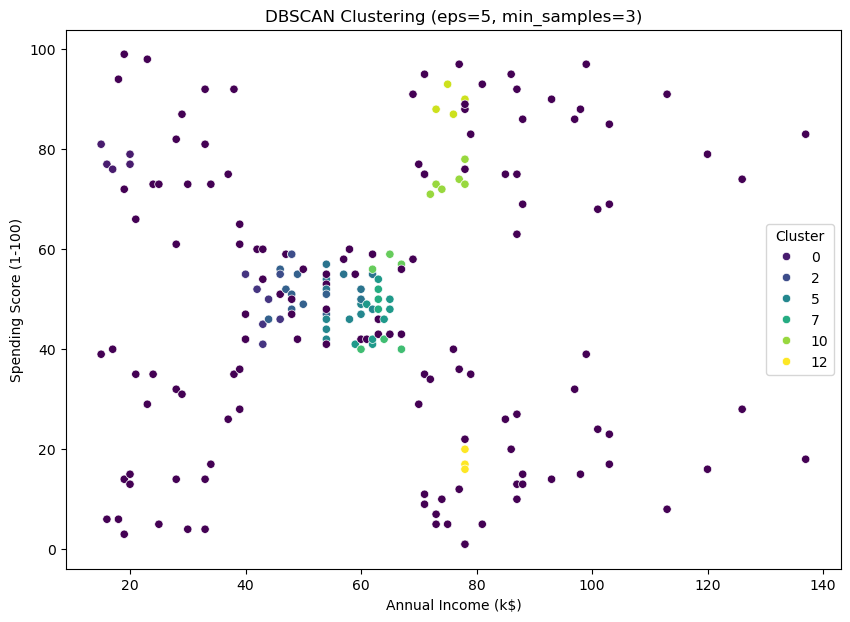

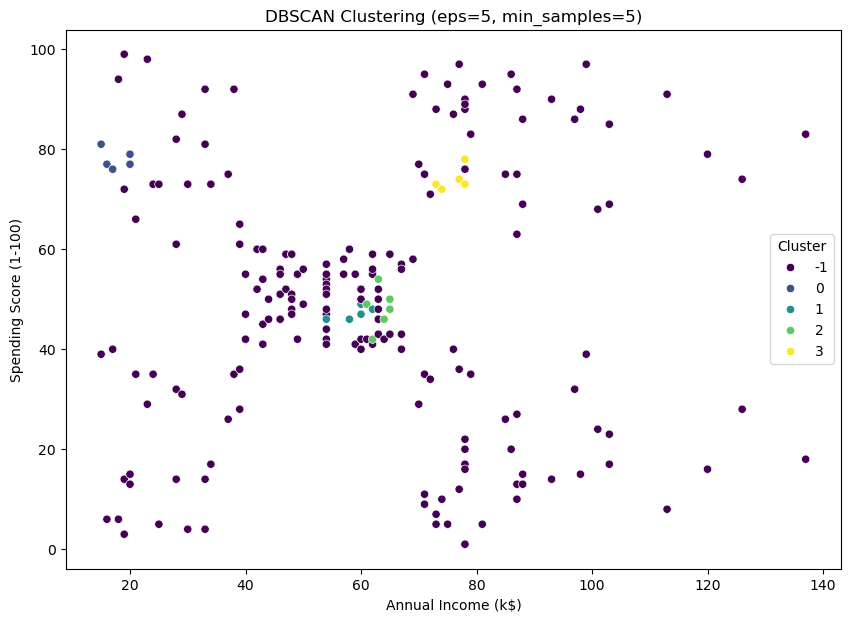

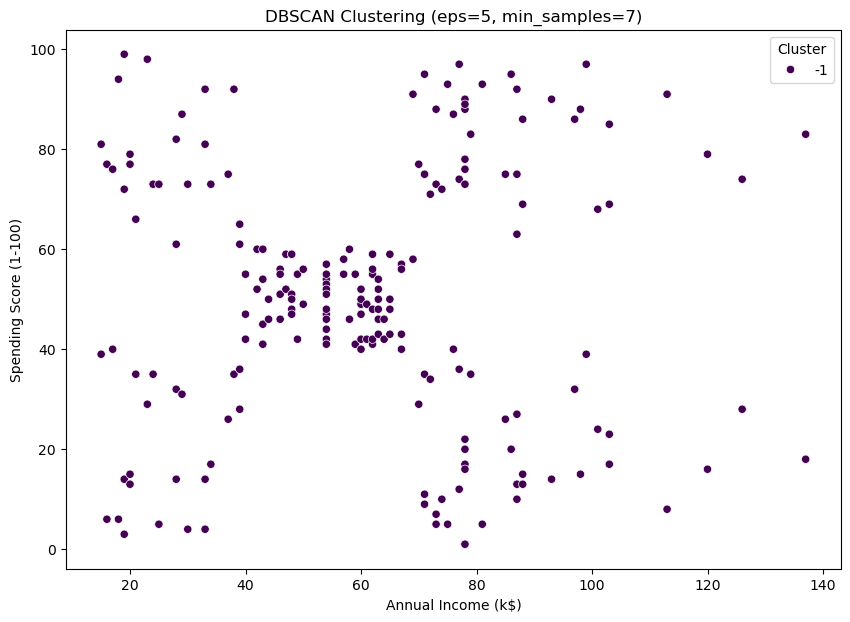

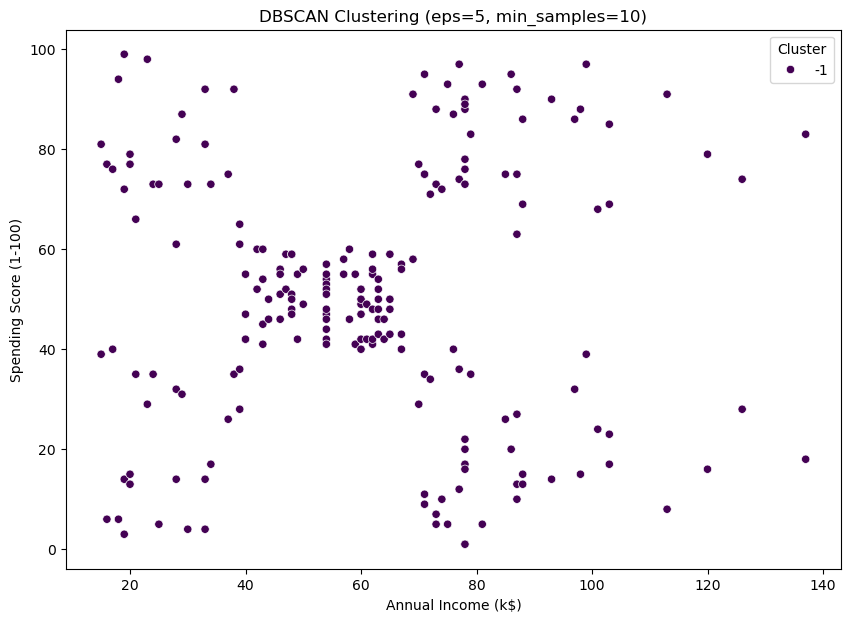

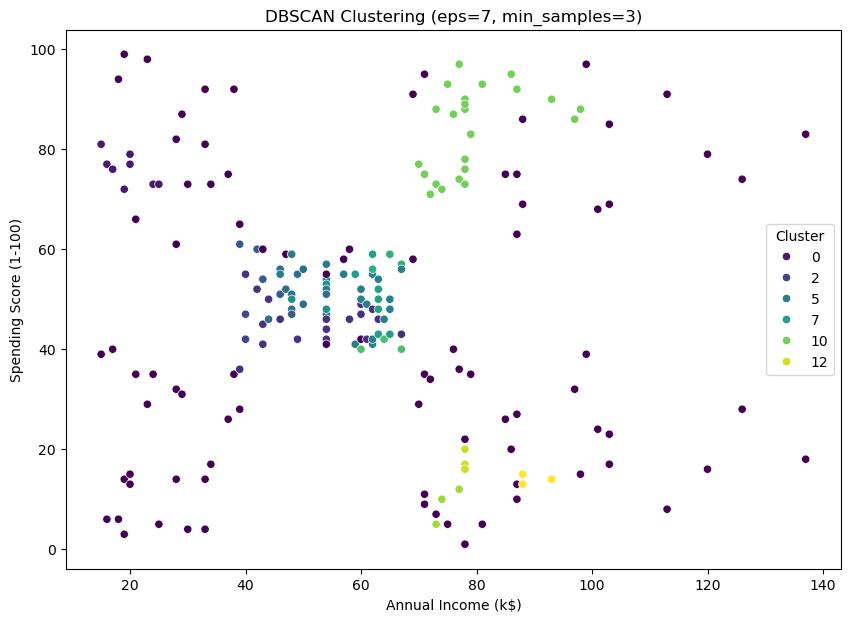

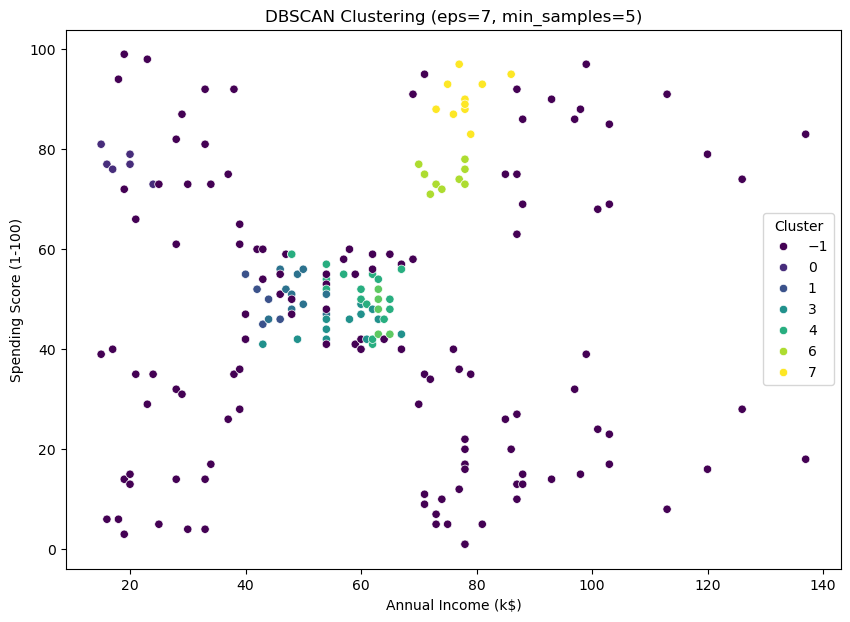

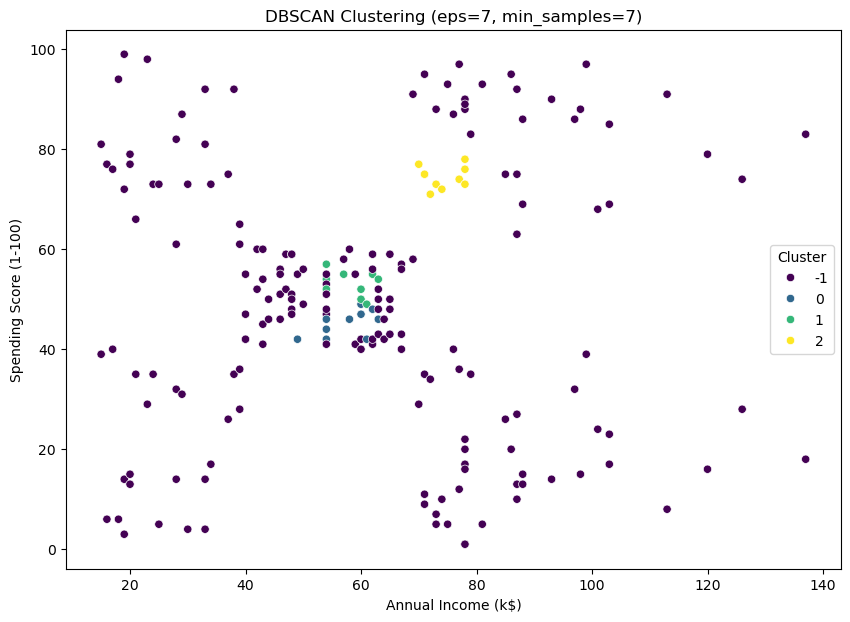

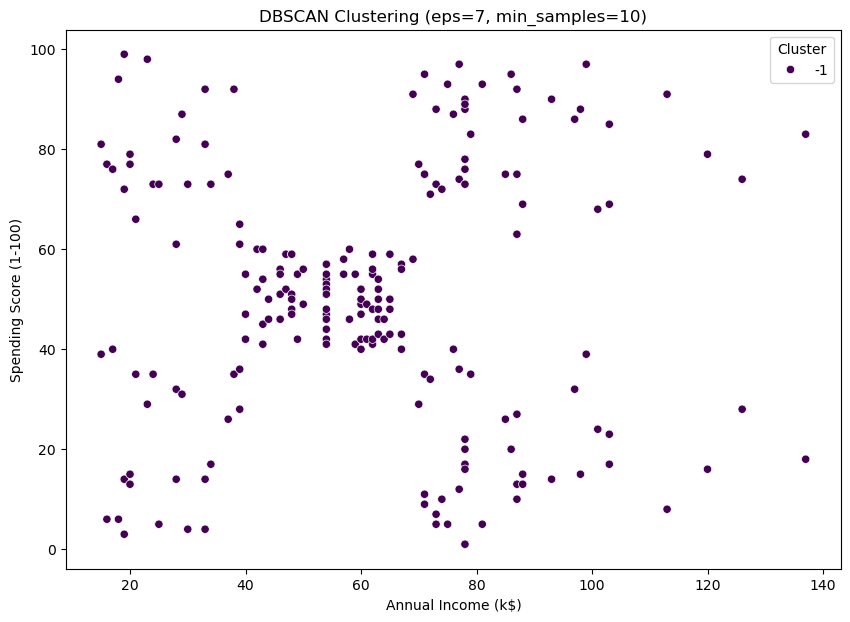

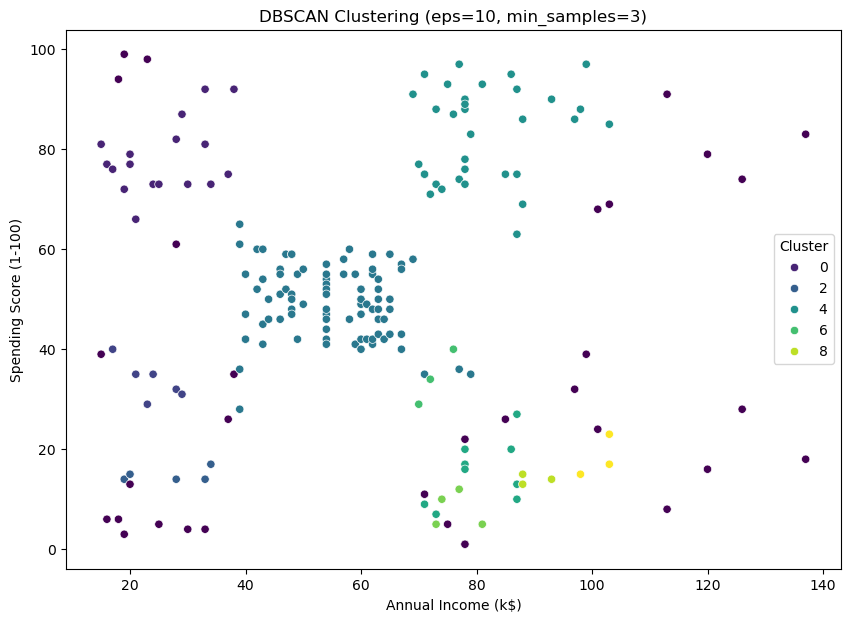

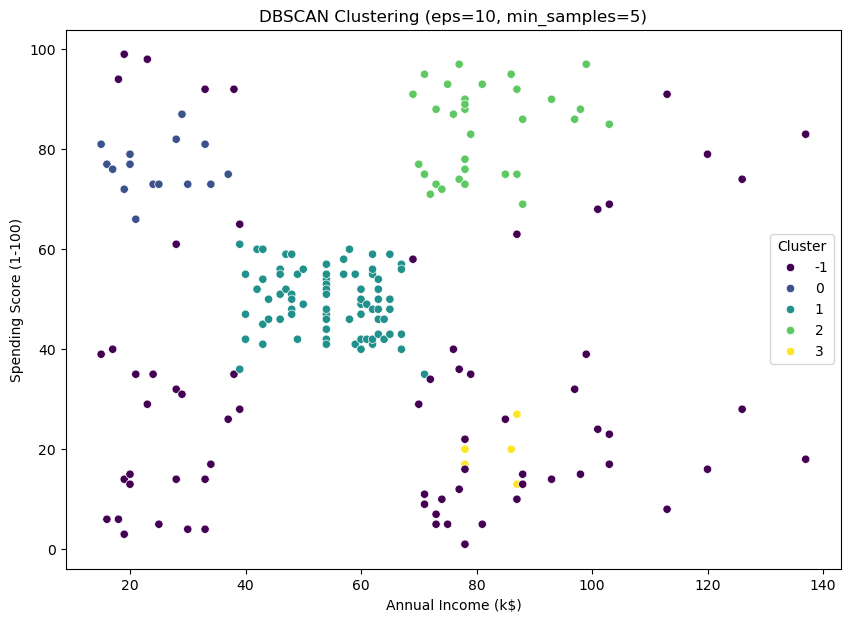

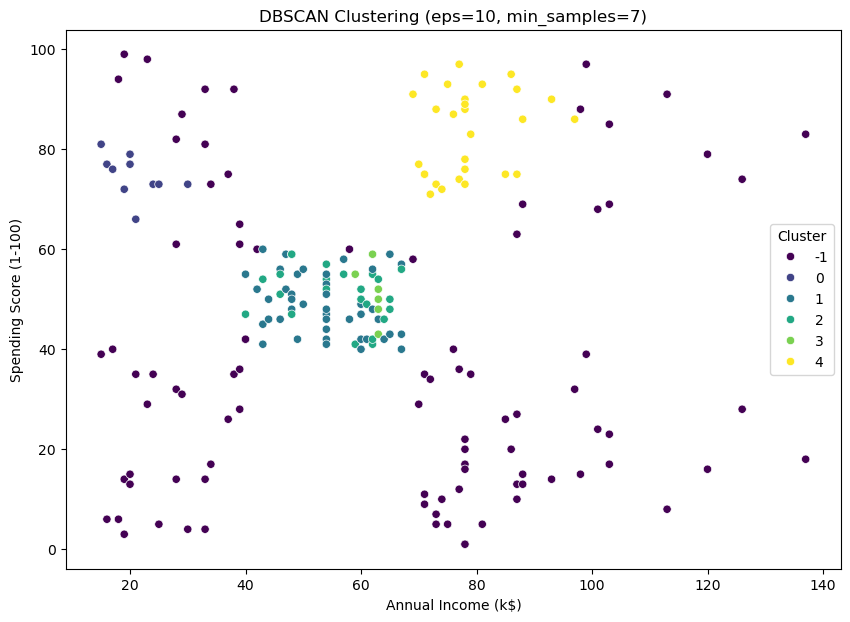

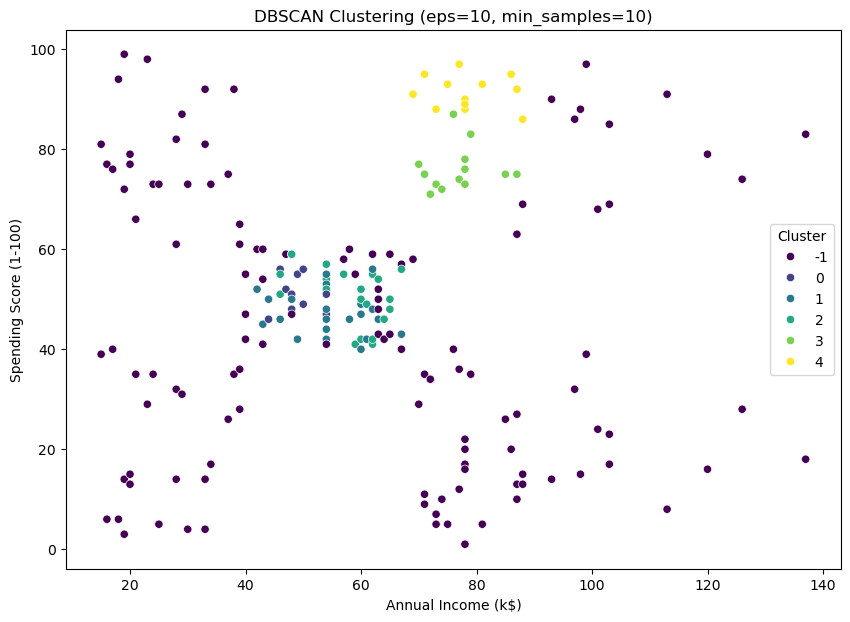

In [29]:
# 다양한 eps와 min_samples 값 시도
eps_values = [3, 5, 7, 10]
min_samples_values = [3, 5, 7, 10]

for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        df['Cluster'] = dbscan.fit_predict(X)
        
        plt.figure(figsize=(10, 7))
        sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', data=df, palette='viridis')
        plt.title(f'DBSCAN Clustering (eps={eps}, min_samples={min_samples})')
        plt.show()